The durations are indicative and obviously depend on each person. If you see that you can't finish an exercise in time, don't hesitate to move to the next exercise.

If you don't have time to finish everything, you can start again this weekend or next week. You will simply indicate in the comments the scripts you have completed afterwards.

# Part 1 - API - around 1h

The following dataset lists a selection of the best restaurants in Paris, at very affordable prices (less than 15 euros per menu on average).
You will use this  [API](https://adresse.data.gouv.fr/api-doc/adresse), to retrieve coordinate points (lon, lat) for each restaurants.

Le jeu de données suivant recense une sélection des meilleurs restaurants de Paris, à des prix très abordables (moins de 15 euros le menu en moyenne). Vous utiliserez cette API pour récupérer les points de coordonnées (lon, lat) de chaque restaurant.


In [ ]:
import pandas as pd

food_paris = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/food.csv").drop(columns = "Unnamed: 0")

In [ ]:
food_paris.head()

,nom,adresse,code postal
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris
2,Pizz'Aria,55 Rue Montmartre,75002 Paris
3,M La Vie,85 Rue Montmartre,75002 Paris
4,Road Trip,36 Rue Poissonnière,75002 Paris


In [ ]:
import requests

def geocode(adresse, codepostal) :
  url = f"https://api-adresse.data.gouv.fr/search/?q={adresse},{codepostal}"
  response = requests.get(url)
  data = response.json()
  coords = data['features'][0]['geometry']['coordinates']
  return coords[1], coords[0]

In [ ]:
food_paris['coordonnee'] = food_paris.apply(lambda row : geocode(row['adresse'], row['code postal']), axis=1)

In [ ]:
food_paris

,nom,adresse,code postal,coordonnee
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris,"(48.864374, 2.336258)"
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris,"(48.86355, 2.344247)"
2,Pizz'Aria,55 Rue Montmartre,75002 Paris,"(48.865983, 2.344484)"
3,M La Vie,85 Rue Montmartre,75002 Paris,"(48.867596, 2.343757)"
4,Road Trip,36 Rue Poissonnière,75002 Paris,"(48.869951, 2.34794)"
5,Rolls,29 Rue des Jeuneurs,75002 Paris,"(48.869541, 2.344421)"
6,Qasti Shawarma,214 Rue Saint-Martin,75003 Paris,"(48.863752, 2.35287)"
7,The Brooklyn Pizzeria,33 Bd Beaumarchais,75003 Paris,"(48.856, 2.368186)"
8,La Baguette du relais,10 Rue des Archives,75004 Paris,"(48.857587, 2.354532)"
9,Olive & Thym,60 Rue Quincampoix,75004 Paris,"(48.861576, 2.35082)"


# Folium

You will now project these restaurants on a map, using the `Folium` library.

Vous allez maintenant projeter ces restaurants sur une carte, à l'aide de la bibliothèque Folium.

In [ ]:
import folium

m = folium.Map(location = food_paris.loc[0, 'coordonnee'], zoom_start=13)

for indice in range(len(food_paris)) :
  folium.Marker(food_paris['coordonnee'][indice], popup=food_paris.loc[indice, 'nom']).add_to(m)

m

# Sorting and grouping

You can now build a descending ranking,  considering the number of restaurants per district.

Vous pouvez désormais construire un classement décroissant, en tenant compte du nombre de restaurants par arrondissement.

In [ ]:

 food_paris['code postal'].value_counts()


code postal
75002 Paris    5
75009 Paris    4
75010 Paris    4
75011 Paris    3
75001 Paris    2
75003 Paris    2
75004 Paris    2
75006 Paris    2
75008 Paris    2
75007 Paris    1
75014 Paris    1
75017 Paris    1
Name: count, dtype: int64

In [ ]:
food_paris['nombre_restaurant'] = food_paris.groupby('code postal')['code postal'].transform('count')


In [ ]:
food_paris = food_paris.sort_values(by='nombre_restaurant', ascending=False)
food_paris

,nom,adresse,code postal,coordonnee,nombre_restaurant
2,Pizz'Aria,55 Rue Montmartre,75002 Paris,"(48.865983, 2.344484)",5
3,M La Vie,85 Rue Montmartre,75002 Paris,"(48.867596, 2.343757)",5
4,Road Trip,36 Rue Poissonnière,75002 Paris,"(48.869951, 2.34794)",5
5,Rolls,29 Rue des Jeuneurs,75002 Paris,"(48.869541, 2.344421)",5
10,Maison de la Poutine,11 Rue Mandar,75002 Paris,"(48.865693, 2.345252)",5
16,Gili Gili,48 Rue Notre Dame de Lorette,75009 Paris,"(48.879628, 2.336203)",4
20,Rond,25 Rue Yves Toudic,75010 Paris,"(48.870867, 2.362903)",4
18,PNY Pigalle,24 Rue Pierre Fontaine,75009 Paris,"(48.881867, 2.334058)",4
19,L'enveloppe,10 Rue Richer,75009 Paris,"(48.874083, 2.347004)",4
17,Kouki,13 Bd Haussmann,75009 Paris,"(48.872501, 2.335385)",4


# Part 2 - Data exploration & processing - Python & Pandas - around 30 min

Run the code below. You will get a DataFrame with 10 000 restaurant comments.
- date: the date of the comment
- stars: the rating (from 1 to 5)
- text: the text of the review
- useful: the number of users who indicated this comment as "useful"
- sentiment: the word "good" or "bad" depending on the stars rating

The goal of these parts will be to explore this dataset, then to propose a prediction model of positive rating according to the other features.

Start by checking that there are no missing values.

Exécutez le code ci-dessous. Vous recevrez un DataFrame avec 10 000 commentaires de restaurants. date : la date du commentaire étoiles : la note (de 1 à 5) texte : le texte de la critique utile : le nombre d'utilisateurs qui ont indiqué ce commentaire comme "utile" sentiment : le mot "bon" ou "mauvais" selon le nombre d'étoiles Le but de ces parties sera d'explorer cet ensemble de données, puis de proposer un modèle de prédiction de note positive en fonction des autres caractéristiques. Commencez par vérifier qu’il n’y a aucune valeur manquante.

In [ ]:
import pandas as pd
df_restaurants = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/restaurant.zip", index_col='Unnamed: 0').loc[:,["date", "stars", "text", "useful"]]
df_restaurants["sentiment"] = df_restaurants["stars"].apply(lambda x: "bad" if x <=3 else "good")
df_restaurants

,date,stars,text,useful,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good
1,2011-07-27,5,I have no idea why some people give bad review...,0,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good
...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad


In [ ]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       10000 non-null  object
 1   stars      10000 non-null  int64 
 2   text       10000 non-null  object
 3   useful     10000 non-null  int64 
 4   sentiment  10000 non-null  object
dtypes: int64(2), object(3)
memory usage: 726.8+ KB


In [ ]:
df_restaurants.isnull().sum()

date         0
stars        0
text         0
useful       0
sentiment    0
dtype: int64

## Column "text"

Use **apply** to create a new column `len_text`, indicating the length (number of characters) of each comment.

Draw a histogram and a boxplot to represent the distribution of this "len_text" column. Are the values well distributed? Are most comments long or short?

Utilisez apply pour créer une nouvelle colonne len_text, indiquant la longueur (nombre de caractères) de chaque commentaire. Dessinez un histogramme et un boxplot pour représenter la distribution de cette colonne "len_text". Les valeurs sont-elles bien réparties ? La plupart des commentaires sont-ils longs ou courts ?

In [ ]:
df_restaurants['len_text'] = df_restaurants['text'].apply(len)

In [ ]:
df_restaurants

,date,stars,text,useful,sentiment,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,good,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good,469
...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad,880


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='len_text', ylabel='Count'>

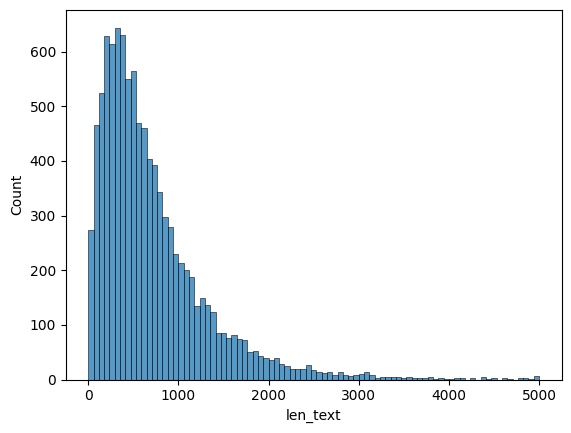

In [ ]:
sns.histplot(data = df_restaurants, x = 'len_text')

<Axes: xlabel='len_text'>

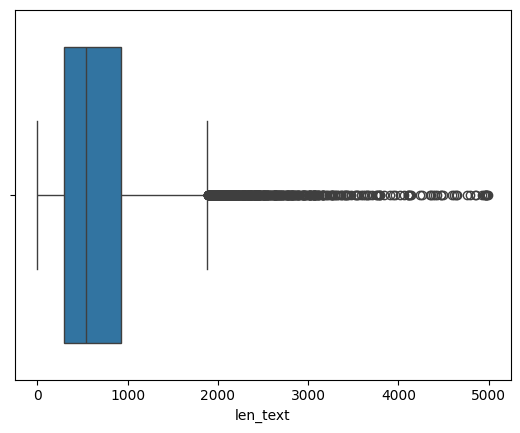

In [ ]:
sns.boxplot(data = df_restaurants, x = 'len_text')

In [ ]:
df_restaurants.describe()

,stars,useful,len_text
count,10000.000000,10000.000000,10000.000000
mean,3.777500,1.409300,710.738700
std,1.214636,2.336647,617.399827
min,1.000000,0.000000,1.000000
25%,3.000000,0.000000,294.000000
50%,4.000000,1.000000,541.500000
75%,5.000000,2.000000,930.000000
max,5.000000,76.000000,4997.000000


La longueurs des commentaires est plutôt répartie autour de la médiane à 541 lettres. Même si la longueur s'étend jusqu'à 5000.

## Column "stars"

- Draw a scatterplot to compare the `useful` column and the `stars` column. Do you think there is a correlation? Please compute the correlation coefficient.

- Ditto between `len_text` and `useful`.

- Please comment and interpret the results.

Dessinez un nuage de points pour comparer la colonne utile et la colonne des étoiles. Pensez-vous qu'il y ait une corrélation ? Veuillez calculer le coefficient de corrélation. Idem entre len_text et utile. Veuillez commenter et interpréter les résultats.


<Axes: xlabel='useful', ylabel='stars'>

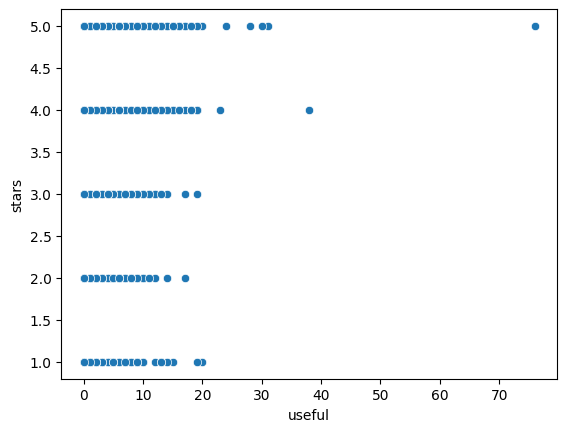

In [ ]:
sns.scatterplot(data = df_restaurants, x = 'useful', y = 'stars')

<Axes: >

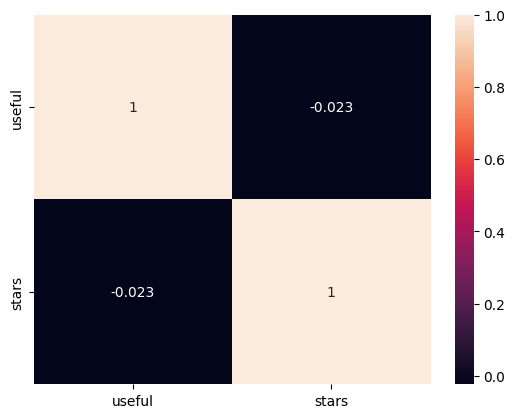

In [ ]:
sns.heatmap(df_restaurants[['useful', 'stars']].corr(), annot=True)

In [ ]:
df_restaurants[['useful', 'stars']].corr()

,useful,stars
useful,1.000000,-0.023479
stars,-0.023479,1.000000


Non il n'y a pas de correlation entre les deux.

# Part 3 : NLP - Sentiment analysis classification - 2h

Define `X` which will contain only the `text` column. And `y` will be the `sentiment` column.

Définissez X qui contiendra uniquement la colonne de texte. Et 'y' ce sera la colonne des sentiments.

In [ ]:
X = df_restaurants['text']
y = df_restaurants['sentiment']

## Create a function to clean up stopwords and punctuation

You can call your function `func_clean`.
Your function must take a `str` as a single parameter, and return a `str`.

Créer une fonction pour nettoyer les mots vides et la ponctuation Vous pouvez appeler votre fonction `func_clean`. Votre fonction doit prendre un `str` comme paramètre unique et renvoyer un `str`.

For example:

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import time
start_time = time.time()

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def func_clean(text):
  # nlp sur le text
  doc = nlp(text)
  # token.lemma = forme du mot. exclut les tokens qui sont des mots vides (comme "le", "et", "de") et les tokens qui sont des signes de ponctuation.
  tokens = [token.lemma_.lower() for token in doc if token.text not in stop_words and token.text not in string.punctuation]
  return ' '.join(tokens)


## Apply this function

Apply this function to `X` and store the result in `X_clean`.

In [ ]:
X_clean = X.apply(func_clean)

In [ ]:
X_clean

0       my wife take birthday breakfast excellent   th...
1       i idea people give bad review place it go show...
2       love gyro plate rice good i also dig candy sel...
3       rosie dakota i love chaparral dog park it be c...
4       general manager scott petello good egg not go ...
                              ...                        
9995    first visit ... have lunch today use groupon  ...
9996    should call house deliciousness \n\n i could g...
9997    i recently visit olive ivy business last week ...
9998    my nephew move scottsdale recently bunch frien...
9999    4 5 location .. 4.5 star average .. i think ar...
Name: text, Length: 10000, dtype: object

## Train test split

Split your `X_clean` and `y` data with a train test split, and the same `random_state = 32`.

Divisez vos données `X_clean` et `y` avec une répartition de test de train, et le même `random_state = 32`.

In [ ]:
X_clean_train, X_clean_test, y_train, y_test = train_test_split(X_clean, y, train_size = 0.7, shuffle = True, random_state=32)

## TfidfVectorizer

- Train `TfidfVectorizer` on `X_train`.
- Transform `X_train` with your vectorizer and store the result in `X_train_vecto`.
- Transform `X_test` with your vectorizer and store the result in `X_test_vecto`.

Entraînez TfidfVectorizer sur X_train. Transformez X_train avec votre vectoriseur et stockez le résultat dans X_train_vecto. Transformez X_test avec votre vectoriseur et stockez le résultat dans X_test_vecto.

In [ ]:
# permet de transformer le textes en représentation numériques (matrice)

#tf = fréquence d'un terme
#idf = mesure de l'importance du texte

tfidf_vect = TfidfVectorizer()


X_train_vecto = tfidf_vect.fit_transform(X_clean_train) # fit_transform pour le train

X_test_vecto = tfidf_vect.transform(X_clean_test) # juste transform pour le test car il n'apprned pas un nouveau vocabulaire

## Logistic regression

Train a logistic regression on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting?

Also display a confusion matrix for the test set. How many "bad" comments are correctly predicted?

Entraînez une régression logistique sur X_train_vecto et y_train. Veuillez comparer les scores de précision des ensembles de formation et de test. Y a-t-il un surapprentissage ? Affichez également une matrice de confusion pour l'ensemble de test. Combien de « mauvais » commentaires sont correctement prédits ?

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression().fit(X_train_vecto, y_train)

In [ ]:
print(model.score(X_train_vecto, y_train))
print(model.score(X_test_vecto, y_test))

0.89
0.8403333333333334


Peut d'écart entre les score de train et test, pas d'overfitting.

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test_vecto)),
             index = model.classes_  + ' actuel',
             columns = model.classes_ + ' Prediction')

,bad Prediction,good Prediction
bad actuel,531,376
good actuel,103,1990


- Il y a 531 'mauvais' commentaire correctement prédit.
- Il y a 376 'mauvai's commentaire ayant été prédis comme 'bon' commentaire.

## Decision tree
Train a decision tree on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting? Are the scores better than previously?

In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DTC= DecisionTreeClassifier().fit(X_train_vecto, y_train)

In [ ]:
print(model_DTC.score(X_train_vecto, y_train))
print(model_DTC.score(X_test_vecto, y_test))

1.0
0.701


In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model_DTC.predict(X_test_vecto)),
             index = model_DTC.classes_  + ' actuel',
             columns = model_DTC.classes_ + ' Prediction')

,bad Prediction,good Prediction
bad actuel,495,412
good actuel,485,1608


Il y a de l'overfitting etant donnée que la différence entre le score train et test est largement de + de 10%. Le modèle donne un résultat moins bon que le précédent.

## Bonus question (optional)

Use `GridsearchCV` to find the best parameters.
Make sure you don't do more than 1000 different iterations (i.e. combinations).
Otherwise, the time may seem very long...





In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
models = {
    'Decision Tree' : (DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 100, 200, 1000]}),
    'Logistic regression' : (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10]})
}

Recherche sur grille pour Decision Tree
Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 10}
Score sur les données d'entrainement': 0.803
Score sur les données de test: 0.719



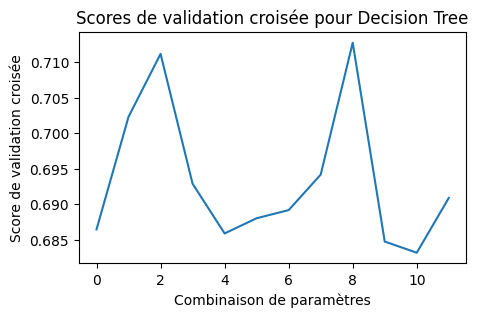


Recherche sur grille pour Logistic regression
Meilleurs paramètres: {'C': 10}
Score sur les données d'entrainement': 0.981
Score sur les données de test: 0.837



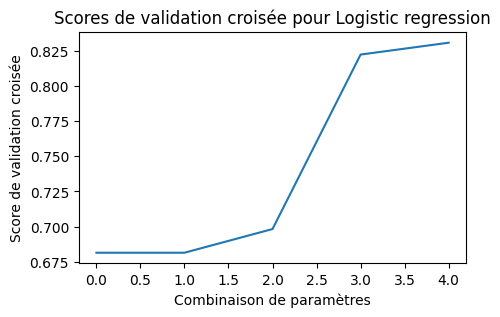

In [ ]:
for model_name, (model, model_params) in models.items():
    print(f"Recherche sur grille pour {model_name}")

    # Créer une instance de GridSearchCV
    grid_search = GridSearchCV(model, model_params, scoring='accuracy', n_jobs=-1)

    # Ajuster GridSearchCV sur les données d'entraînement
    grid_search.fit(X_train_vecto, y_train)

    # Afficher les meilleurs paramètres
    print(f"Meilleurs paramètres: {grid_search.best_params_}")

    # Évaluer le meilleur modèle sur les données de test
    best_model = grid_search.best_estimator_
    train_score = best_model.score(X_train_vecto, y_train)
    print(f"Score sur les données d'entrainement': {train_score:.3f}")
    test_score = best_model.score(X_test_vecto, y_test)
    print(f"Score sur les données de test: {test_score:.3f}")
    print()


    cv_results = grid_search.cv_results_
    plt.figure(figsize=(5, 3))
    plt.plot(cv_results['mean_test_score'])
    plt.xlabel('Combinaison de paramètres')
    plt.ylabel('Score de validation croisée')
    plt.title(f'Scores de validation croisée pour {model_name}')
    plt.show()

    print()

# Optionnel : Algorithme `JSON` et manipulation.
This is a json file containing several keys.
Each key has a value, which could potentially be another key, containing another value, which could potentially be another key etc...

In [ ]:
food = {
  "clé1": {
    "fruit1": "pomme",
    "légume4": "brocoli"
  },
  "clé2": {
    "légume1": "carotte",
    "fruit5": "banane",
    "légume3": "courgette"
  },
  "clé3": {
    "niveau1": {
      "niveau2": {
        "fruit3": "orange",
        "légume5": "aubergine",
        "fruit5": "mangue"
      }
    }
  },
  "clé4": {
    "niveau1": {
      "niveau2": {
        "niveau3": {
          "fruit6": "raisin",
          "fruit7": "fraise",
          "légume4": "poivron",
          "fruit2": "pastèque"
        }
      }
    }
  }
}


In [ ]:
food

{'clé1': {'fruit1': 'pomme', 'légume4': 'brocoli'},
 'clé2': {'légume1': 'carotte', 'fruit5': 'banane', 'légume3': 'courgette'},
 'clé3': {'niveau1': {'niveau2': {'fruit3': 'orange',
    'légume5': 'aubergine',
    'fruit5': 'mangue'}}},
 'clé4': {'niveau1': {'niveau2': {'niveau3': {'fruit6': 'raisin',
     'fruit7': 'fraise',
     'légume4': 'poivron',
     'fruit2': 'pastèque'}}}}}

Problem:
Fruits and vegetables have been misplaced in this json file. The goal is to retrieve each of the fruits and vegetables, and assign them to two corresponding lists: `fruits_list` & `vegetables_list`.

Expected solution:

`fruits_list` = `['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']`

`vegetables_list` = `['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']`



In [ ]:
dico = {
    'fruits': [],
    'légumes' : []
}

def mots(x):
  if isinstance(x, dict):   # isinstance permet de vérifié le type de x. Ici si c'est un dictionnaire alors on passe à la suite.
    for clé, valeur in x.items():  # Parcours des clé et valeur de x.
      if isinstance(valeur, dict):  # condition que si valeur de la clé du x est un dictionnaire alors on passe à la prochaine condition.
        mots(valeur)
      elif clé.startswith('fruit'):  # la clé commence par 'fruit' on met la valeur associé dans le dictionnaire.
        dico["fruits"].append(valeur)
      elif clé.startswith('légume'):  # la clé commence par 'legume" on met la valeur associé dans le dictionnaire.
        dico["légumes"].append(valeur)

In [ ]:
mots(food)
dico

{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'légumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}

Next, you'll create a new dictionary, which will simply contain two keys: `fruits` & `vegetables`. Each key will have the value of the list of fruits and the list of vegetables. That way, everything will be in order.

Expected solution:
`food_dict` = `{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}`